# Theoretical Questions

#1. What is K-Nearest Neighbors (KNN) and how does it work?
-> KNN is a supervised machine learning algorithm used for classification and regression. It works by finding the ‘K’ nearest data points (neighbors) to a given query point using a distance metric (like Euclidean distance) and assigns the most common class (for classification) or average value (for regression).

#2. What is the difference between KNN Classification and KNN Regression?

-> KNN Classification assigns a class label based on the majority vote of the K nearest neighbors.

KNN Regression predicts a continuous value based on the average (or weighted average) of the K nearest neighbors’ values.

#3. What is the role of the distance metric in KNN?
-> The distance metric determines how the similarity between points is measured. Common metrics include Euclidean, Manhattan, and Minkowski distances. The metric affects which neighbors are considered "nearest" and hence influences the prediction.

#4. What is the Curse of Dimensionality in KNN?
-> As the number of features (dimensions) increases, the data points become sparse and the distance between them becomes less meaningful, making it harder for KNN to find relevant neighbors and reducing its effectiveness.

#5. How can we choose the best value of K in KNN?
-> The best value of K is usually chosen through experimentation using methods like cross-validation. A small K may lead to overfitting, while a large K can lead to underfitting.

#6. What are KD Tree and Ball Tree in KNN?
-> KD Tree and Ball Tree are data structures used to optimize the nearest neighbor search in KNN by organizing data points in a tree-like structure, which makes querying more efficient, especially in lower dimensions.

#7. When should you use KD Tree vs. Ball Tree?

-> KD Tree is more efficient for low-dimensional data.

Ball Tree is better suited for high-dimensional or non-uniform data distributions.

#8. What are the disadvantages of KNN?

-> High computation cost for large datasets.

Sensitive to irrelevant features and feature scaling.

Poor performance in high-dimensional spaces.

Requires storing the entire training dataset.

#9. How does feature scaling affect KNN?

-> KNN relies on distance metrics, so features with larger scales can dominate the distance calculation. Feature scaling (like normalization or standardization) ensures all features contribute equally.

#10. What is PCA (Principal Component Analysis)?
-> PCA is a dimensionality reduction technique that transforms a dataset into a set of linearly uncorrelated components (principal components) while preserving as much variance as possible.

#11. How does PCA work?
-> PCA computes the covariance matrix of the data, finds its eigenvalues and eigenvectors, and projects the data onto the top ‘k’ eigenvectors (principal components) that capture the most variance.

#12. What is the geometric intuition behind PCA?
-> PCA rotates the data to align with directions of maximum variance. It finds new axes (principal components) that better represent the structure of the data in fewer dimensions.

#13. What is the difference between Feature Selection and Feature Extraction?

-> Feature Selection chooses a subset of existing features.

Feature Extraction creates new features from the original ones (like PCA), combining information to reduce dimensionality.

#14. What are Eigenvalues and Eigenvectors in PCA?
->
Eigenvectors represent directions (principal components) in which data varies the most.

Eigenvalues indicate the magnitude of variance in those directions.

#15. How do you decide the number of components to keep in PCA?
->You can choose the number of components based on the explained variance ratio — often by selecting enough components to retain 95% of the variance.

#16. Can PCA be used for classification?
-> PCA itself is not a classification algorithm, but it can be used as a preprocessing step to reduce dimensionality before applying classification algorithms.

#17. What are the limitations of PCA?

-> Assumes linear relationships.

Sensitive to scaling.

May lose interpretability.

Not effective if data is not centered or normalized.

#18. How do KNN and PCA complement each other?
-> PCA reduces dimensionality, which mitigates the curse of dimensionality and speeds up KNN computations. Applying PCA before KNN can enhance performance and accuracy.

#19. How does KNN handle missing values in a dataset?
-> KNN does not inherently handle missing values. Preprocessing steps like imputation (e.g., using mean or KNN-based imputation) are required to fill in missing values.

#20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
->
PCA is unsupervised and focuses on maximizing variance.

LDA is supervised and aims to maximize class separability.

PCA does not use label information, while LDA does.



# Practical Questions

In [1]:
#21. Train a KNN Classifier on the Iris dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions & Accuracy
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
#22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

# Predict & MSE
y_pred = knn_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 128.82204336272395


In [5]:
#23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.
# Load the iris dataset again to get the correct target variable
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# Split data (using the same random_state for consistency)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean
from sklearn.neighbors import KNeighborsClassifier

knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_eu = knn_euclidean.predict(X_test)

# Manhattan
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_man = knn_manhattan.predict(X_test)

# Print accuracies
from sklearn.metrics import accuracy_score

print("Euclidean Accuracy:", accuracy_score(y_test, y_pred_eu))
print("Manhattan Accuracy:", accuracy_score(y_test, y_pred_man))

Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


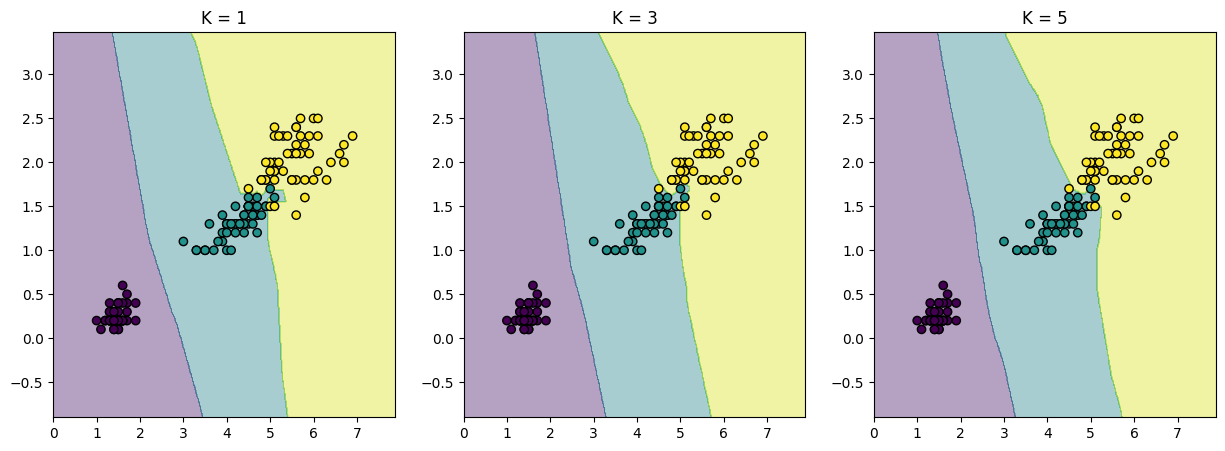

In [6]:
#24. Train a KNN Classifier with different values of K and visualize decision boundaries.
#Note: Visualization only works with 2D data.

import matplotlib.pyplot as plt
import numpy as np

# Reduce to 2D using Iris petal length & width
X_vis = X[:, 2:4]

X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

plt.figure(figsize=(15, 5))
for i, k in enumerate([1, 3, 5]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Plot decision boundary
    h = .02
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k')
    plt.title(f'K = {k}')
plt.show()

In [7]:
#25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

from sklearn.preprocessing import StandardScaler

# Without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Unscaled Accuracy:", acc_unscaled)
print("Scaled Accuracy:", acc_scaled)


Unscaled Accuracy: 1.0
Scaled Accuracy: 1.0


In [8]:
#26. Train a PCA model on synthetic data and print the explained variance ratio for each component.
from sklearn.decomposition import PCA

# Generate synthetic data
X_syn, _ = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Apply PCA
pca = PCA()
pca.fit(X_syn)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.26256655 0.21579693 0.20219416 0.18127308 0.13816928]


In [9]:
#27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

# Without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_train_scaled, y_train)
acc_no_pca = accuracy_score(y_test, knn_no_pca.predict(X_test_scaled))

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_with_pca = KNeighborsClassifier(n_neighbors=3)
knn_with_pca.fit(X_train_pca, y_train)
acc_with_pca = accuracy_score(y_test, knn_with_pca.predict(X_test_pca))

print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA:", acc_with_pca)

Accuracy without PCA: 1.0
Accuracy with PCA: 1.0


In [10]:
#28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
params = {'n_neighbors': list(range(1, 11))}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'n_neighbors': 3}
Best Accuracy: 0.95


In [11]:
#29. Train a KNN Classifier and check the number of misclassified samples.

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

misclassified = (y_test != y_pred).sum()
print("Number of misclassified samples:", misclassified)


Number of misclassified samples: 0


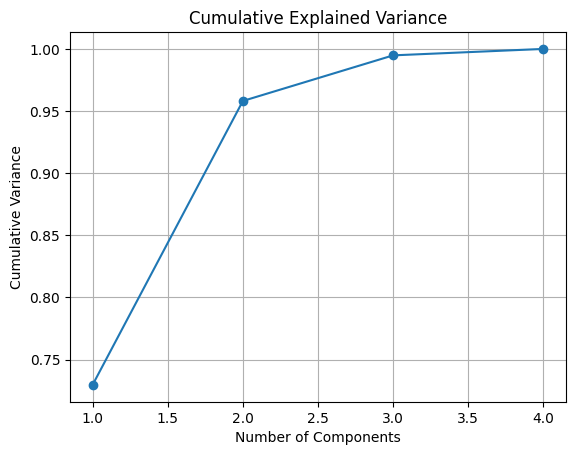

In [12]:
#30. Train a PCA model and visualize the cumulative explained variance.

import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled := StandardScaler().fit_transform(X))

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()


In [14]:
# Q31: Compare KNN with uniform vs distance weights.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

uniform_model = KNeighborsClassifier(n_neighbors=3, weights='uniform')
uniform_model.fit(X_train, y_train)

distance_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
distance_model.fit(X_train, y_train)
print(" Compare KNN with uniform vs distance weights")
print("Uniform Accuracy:", uniform_model.score(X_test, y_test))
print("Distance Accuracy:", distance_model.score(X_test, y_test))



 Compare KNN with uniform vs distance weights
Uniform Accuracy: 1.0
Distance Accuracy: 1.0


In [15]:
# Q32: Evaluate KNN Regressor for K=1 to 10 using MSE.
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_reg, y_reg = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("Evaluate KNN Regressor for K=1 to 10 using MSE")
for k in range(1, 11):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"K={k}, MSE={mse:.2f}")


Evaluate KNN Regressor for K=1 to 10 using MSE
K=1, MSE=2041.31
K=2, MSE=1190.57
K=3, MSE=1357.30
K=4, MSE=928.87
K=5, MSE=801.58
K=6, MSE=1154.57
K=7, MSE=1347.04
K=8, MSE=1316.98
K=9, MSE=1414.08
K=10, MSE=1399.53


In [16]:
# Q33: Apply PCA to reduce Iris dataset to 2 components.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris.data)

print("Apply PCA to reduce Iris dataset to 2 components")
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Apply PCA to reduce Iris dataset to 2 components
Explained Variance Ratio: [0.92461872 0.05306648]


In [17]:
# Q34: Apply PCA on Wine dataset to 2D.
from sklearn.datasets import load_wine

wine = load_wine()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wine.data)

print("Apply PCA on Wine dataset to 2D")
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Apply PCA on Wine dataset to 2D
Explained Variance Ratio: [0.99809123 0.00173592]


In [18]:
# Q35: Train KNN on Wine dataset and show classification report.
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Train KNN on Wine dataset and show classification report")
print(classification_report(y_test, y_pred))


Train KNN on Wine dataset and show classification report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [19]:
# Q36: Find best K (1–20) for KNN classifier on Iris using accuracy.
print("Find best K (1–20) for KNN classifier on Iris using accuracy")
best_k = 1
best_acc = 0
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    if acc > best_acc:
        best_acc = acc
        best_k = k
print(f"Best K: {best_k}, Accuracy: {best_acc:.4f}")


Find best K (1–20) for KNN classifier on Iris using accuracy
Best K: 3, Accuracy: 0.8056


In [20]:
# Q37: Apply PCA with 95% variance retention on Wine dataset.
pca = PCA(n_components=0.95)
pca.fit(wine.data)

print("Apply PCA with 95% variance retention on Wine dataset")
print("Number of components selected:", pca.n_components_)


Apply PCA with 95% variance retention on Wine dataset
Number of components selected: 1


In [21]:
# Q38: Compare accuracy before and after PCA on Wine dataset.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(wine.data)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, wine.target, test_size=0.2, random_state=42)

model_original = KNeighborsClassifier()
model_original.fit(X_train, y_train)
acc_original = model_original.score(X_test, y_test)

model_pca = KNeighborsClassifier()
model_pca.fit(X_train_pca, y_train)
acc_pca = model_pca.score(X_test_pca, y_test)

print("Compare accuracy before and after PCA on Wine dataset")
print(f"Original Accuracy: {acc_original:.4f}, PCA Accuracy: {acc_pca:.4f}")


Compare accuracy before and after PCA on Wine dataset
Original Accuracy: 0.7222, PCA Accuracy: 0.7222


In [22]:
# Q39: Perform classification with PCA and Logistic Regression on Iris dataset.
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

print("Perform classification with PCA and Logistic Regression on Iris dataset")
print("Accuracy:", log_model.score(X_test, y_test))


Perform classification with PCA and Logistic Regression on Iris dataset
Accuracy: 1.0


In [23]:
# Q40: Apply PCA and visualize data (first 5 rows).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

print("Apply PCA and visualize data")
print("First 5 PCA Transformed Rows:\n", X_pca[:5])


Apply PCA and visualize data
First 5 PCA Transformed Rows:
 [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [24]:
# Q41: Evaluate KNN with distance metric 'manhattan'.
model = KNeighborsClassifier(metric='manhattan')
model.fit(X_train, y_train)

print("Evaluate KNN with distance metric 'manhattan'")
print("Accuracy:", model.score(X_test, y_test))

Evaluate KNN with distance metric 'manhattan'
Accuracy: 1.0


In [25]:
# Q42: Explain role of StandardScaler before KNN.
print(" Explain role of StandardScaler before KNN")
print("StandardScaler ensures all features contribute equally to distance calculation in KNN.")

 Explain role of StandardScaler before KNN
StandardScaler ensures all features contribute equally to distance calculation in KNN.


In [26]:
# Q43: Calculate ROC AUC for Logistic Regression on binary Iris classification.
from sklearn.metrics import roc_auc_score

X_binary = iris.data[iris.target != 2]
y_binary = iris.target[iris.target != 2]
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

print("Calculate ROC AUC for Logistic Regression on binary Iris classification")
print("ROC AUC Score:", auc)


Calculate ROC AUC for Logistic Regression on binary Iris classification
ROC AUC Score: 1.0


In [27]:
# Q44: Train KNN on standardized and non-standardized data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_raw = KNeighborsClassifier()
model_raw.fit(X_train, y_train)
acc_raw = model_raw.score(X_test, y_test)

model_scaled = KNeighborsClassifier()
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = model_scaled.score(X_test_scaled, y_test)

print("Train KNN on standardized and non-standardized data")
print(f"Accuracy without scaling: {acc_raw:.4f}, with scaling: {acc_scaled:.4f}")


Train KNN on standardized and non-standardized data
Accuracy without scaling: 1.0000, with scaling: 1.0000


In [28]:
# Q45: Apply PCA then train KNN classifier on Iris dataset.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print("Apply PCA then train KNN classifier on Iris dataset")
print("Accuracy:", model.score(X_test, y_test))

Apply PCA then train KNN classifier on Iris dataset
Accuracy: 1.0


In [29]:
# Q46: Difference between PCA and StandardScaler.
print("Difference between PCA and StandardScaler")
print("PCA reduces dimensions based on variance; StandardScaler standardizes features to mean 0 and variance 1.")


Difference between PCA and StandardScaler
PCA reduces dimensions based on variance; StandardScaler standardizes features to mean 0 and variance 1.


In [30]:
# Q47: Use PCA to visualize Wine dataset in 2D (first 5 rows).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(wine.data)

print("Use PCA to visualize Wine dataset in 2D")
print("First 5 PCA transformed rows:\n", X_pca[:5])


Use PCA to visualize Wine dataset in 2D
First 5 PCA transformed rows:
 [[ 3.18562979e+02  2.14921307e+01]
 [ 3.03097420e+02 -5.36471768e+00]
 [ 4.38061133e+02 -6.53730945e+00]
 [ 7.33240139e+02  1.92729032e-01]
 [-1.15714285e+01  1.84899946e+01]]


In [31]:
# Q48: Train and evaluate KNN classifier using PCA-reduced data.
X_train, X_test, y_train, y_test = train_test_split(X_pca, wine.target, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print("Train and evaluate KNN classifier using PCA-reduced data")
print("Accuracy:", model.score(X_test, y_test))


Train and evaluate KNN classifier using PCA-reduced data
Accuracy: 0.7222222222222222
